# Project - Olympic Sports Analysis [Data Pre-processing]

##### - You can find the full project & the dataset at: https://www.kaggle.com/the-guardian/olympic-games

## Olympic Sports and Medals, 1896-2014
Which countries and athletes have won the most medals at the Olympic games?

### Importing libraries & data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

In [2]:
summer = pd.read_csv('summer.csv')

In [3]:
winter = pd.read_csv('winter.csv')

In [4]:
countries = pd.read_csv('dictionary.csv')

### Inspecting Datasets

In [12]:
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [5]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [6]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [7]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [8]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [9]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


In [11]:
summer.Event.value_counts()

Event
Football                          1497
Hockey                            1422
Team Competition                  1147
Basketball                        1012
Handball                           973
                                  ... 
Class B Up To 60 Feet                2
65.77 - 71.67KG (Middleweight)       2
- 47.63KG (Flyweight)                2
47.63 - 52.16KG (Bantamweight)       2
Open Class A                         1
Name: count, Length: 666, dtype: int64

In [13]:
# Listing all of the missing data in the 'countries' dataframe
countries[countries.isnull().any(axis = 1)].reset_index(drop=True)

,Country,Code,Population,GDP per Capita
0,American Samoa*,ASA,55538.0,NaN
1,Andorra,AND,70473.0,NaN
2,Aruba*,ARU,103889.0,NaN
3,Bermuda*,BER,65235.0,NaN
4,British Virgin Islands,IVB,30117.0,NaN
5,Cayman Islands*,CAY,59967.0,NaN
6,Cook Islands,COK,NaN,NaN
7,Cuba,CUB,11389562.0,NaN
8,Eritrea,ERI,NaN,NaN
9,Guam,GUM,169885.0,NaN


### Proposed Questions

- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

- ***Which are the most successful countries in both Summer and Winter editions?***
    - What are the __Top 10__ Countries by __total medals__?
    - __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
    - __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 


- ***Analysing all Summer editions data***
    - Can you find the __highest__ male / female __athletes__ of all time in the Summer editions?
    - Find the highest __athletes__ regarding to each __medal type__ in the Summer editions?

##### Q. Can you find the highest male / female athletes of all time in the Summer editions

In [14]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [17]:
summer.Athlete.str.split(', ').str[::-1] #reverse the name to put first name then last name 

0                    [Alfred, HAJOS]
1                 [Otto, HERSCHMANN]
2                [Dimitrios, DRIVAS]
3               [Ioannis, MALOKINIS]
4               [Spiridon, CHASAPIS]
                    ...             
31160           [Damian, JANIKOWSKI]
31161    [Ghasem Gholamreza, REZAEI]
31162               [Rustam, TOTROV]
31163            [Artur, ALEKSANYAN]
31164               [Jimmy, LIDBERG]
Name: Athlete, Length: 31165, dtype: object

In [18]:
summer.Athlete.str.split(', ').str[::-1].str.join(' ') #to convert list to string again

0                    Alfred HAJOS
1                 Otto HERSCHMANN
2                Dimitrios DRIVAS
3               Ioannis MALOKINIS
4               Spiridon CHASAPIS
                   ...           
31160           Damian JANIKOWSKI
31161    Ghasem Gholamreza REZAEI
31162               Rustam TOTROV
31163            Artur ALEKSANYAN
31164               Jimmy LIDBERG
Name: Athlete, Length: 31165, dtype: object

In [20]:
summer['Athlete'] = summer.Athlete.str.split(', ').str[::-1].str.join(' ')
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze


In [21]:
countries

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [23]:
summer = summer.merge(countries, left_on='Country', right_on='Code', how='left')
summer

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y,Code,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary,HUN,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria,AUT,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece,GRE,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece,GRE,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece,GRE,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland,POL,37999494.0,12554.547554
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran,IRI,79109272.0,NaN
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia,RUS,144096812.0,9092.580536
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia,ARM,3017712.0,3489.127690


In [24]:
summer.drop(columns=['Code', 'Population', 'GDP per Capita'], inplace= True)

In [25]:
summer

,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia


In [26]:
summer.rename(columns={'Country_x': 'Code', 'Country_y':'Country'}, inplace = True)
summer

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia


In [34]:
summer[summer['Gender'] == 'Men']['Athlete'].value_counts()[:10].index[:1]

Index(['Michael PHELPS'], dtype='object', name='Athlete')

In [35]:
summer[summer['Gender'] == 'Men']['Athlete'].value_counts()[:10].values[0] #.max()

np.int64(22)

In [36]:
# The highest female athlete of all Summer editions 
summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]

'Larisa LATYNINA'

In [37]:
# Her total number of medals
summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]

np.int64(18)

##### Q. Find the highest athletes regarding to each medal type in the Summer editions

In [38]:
summer

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred HAJOS,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto HERSCHMANN,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios DRIVAS,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis MALOKINIS,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon CHASAPIS,GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,Damian JANIKOWSKI,POL,Men,Wg 84 KG,Bronze,Poland
31161,2012,London,Wrestling,Wrestling Freestyle,Ghasem Gholamreza REZAEI,IRI,Men,Wg 96 KG,Gold,Iran
31162,2012,London,Wrestling,Wrestling Freestyle,Rustam TOTROV,RUS,Men,Wg 96 KG,Silver,Russia
31163,2012,London,Wrestling,Wrestling Freestyle,Artur ALEKSANYAN,ARM,Men,Wg 96 KG,Bronze,Armenia


In [39]:
summer[summer['Athlete'] == 'Michael PHELPS']

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
25225,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,100M Butterfly,Gold,United States
25253,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,200M Butterfly,Gold,United States
25258,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,200M Freestyle,Bronze,United States
25265,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,200M Individual Medley,Gold,United States
25277,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,400M Individual Medley,Gold,United States
25286,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,4X100M Freestyle Relay,Bronze,United States
25325,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,4X100M Medley Relay,Gold,United States
25361,2004,Athens,Aquatics,Swimming,Michael PHELPS,USA,Men,4X200M Freestyle Relay,Gold,United States
27224,2008,Beijing,Aquatics,Swimming,Michael PHELPS,USA,Men,100M Butterfly,Gold,United States
27252,2008,Beijing,Aquatics,Swimming,Michael PHELPS,USA,Men,200M Butterfly,Gold,United States


In [44]:
top_medals = summer.groupby(['Athlete', 'Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)
top_medals 

,Athlete,Medal,Sport
17347,Michael PHELPS,Gold,18
16587,Mark SPITZ,Gold,9
14741,Larisa LATYNINA,Gold,9
3521,Carl LEWIS,Gold,9
19234,Paavo NURMI,Gold,9
...,...,...,...
15,A. LAWREY,Silver,1
16,A. MARA,Gold,1
17,A. MARIACHER,Silver,1
18,A. MCEVOY,Silver,1


In [45]:
top_medals.rename(columns={'Sport':'Count'}, inplace=True)

In [46]:
top_medals

,Athlete,Medal,Count
17347,Michael PHELPS,Gold,18
16587,Mark SPITZ,Gold,9
14741,Larisa LATYNINA,Gold,9
3521,Carl LEWIS,Gold,9
19234,Paavo NURMI,Gold,9
...,...,...,...
15,A. LAWREY,Silver,1
16,A. MARA,Gold,1
17,A. MARIACHER,Silver,1
18,A. MCEVOY,Silver,1


In [47]:
top_medals[top_medals['Athlete'] == 'Michael PHELPS']

,Athlete,Medal,Count
17347,Michael PHELPS,Gold,18
17346,Michael PHELPS,Bronze,2
17348,Michael PHELPS,Silver,2


In [48]:
top_medals = top_medals.drop_duplicates(subset=['Medal'],keep='first')
top_medals.columns = [['Athlete','Medal','Count']]
top_medals

,Athlete,Medal,Count
17347,Michael PHELPS,Gold,18
17182,Merlene OTTEY-PAGE,Bronze,6
17607,Mikhail VORONIN,Silver,6


##### Q. Which are the most successful countries in both Summer and Winter editions?
- What are the __Top 10__ Countries by __total medals__?
- __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 
- __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

#### 1] Data Merging

In [50]:
summer = pd.read_csv('summer.csv')

In [51]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [52]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [55]:
olympics = pd.concat([summer, winter], keys=['Summer','Winter'], names=['Edition']).reset_index().drop(columns='level_1')
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [57]:
olympics = olympics.merge(countries.iloc[:,:2], how='left', left_on = 'Country', right_on='Code').drop(columns=['Code']).rename(columns={'Country_x':'Code', 'Country_y': 'Country'})
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


#### 2] Data Cleaning

In [58]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country     30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [64]:
olympics[olympics['Country'].isna()]['Code'].value_counts()

Code
URS    2489
GDR     987
ROU     642
FRG     584
TCH     487
YUG     442
EUN     283
EUA     281
ZZX      48
SRB      31
ANZ      29
RU1      17
MNE      14
TTO      10
BOH       7
BWI       5
SGP       4
IOP       3
Name: count, dtype: int64

In [67]:
old_codes = olympics[olympics['Country'].isna()]['Code'].value_counts().index
old_codes

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [70]:
# Create a mapper to match the old countries' codes with their corresponding names
mapper = pd.Series(index=old_codes, name = "Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

mapper

Code
URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [71]:
# Let's get all the missing data indicies to map them to countries
missing_indices = olympics.loc[olympics.Country.isnull()].index
missing_indices

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979, 33980],
      dtype='int64', length=6367)

In [72]:
# Now, we need to map the names
olympics.loc[missing_indices, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [73]:
# Filling the missing data with the new names
olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)

C:\Users\alhef\AppData\Local\Temp\ipykernel_13088\2437805990.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  olympics.Country.fillna(olympics.Code.map(mapper), inplace = True)


In [74]:
olympics.loc[missing_indices]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


In [75]:
olympics['Country'].isnull().sum()

np.int64(4)

In [77]:
olympics[olympics['Country'].isnull()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


##### Remove rows from olympics where the Country code is unknown

In [78]:
olympics.dropna(subset=['Code'], inplace=True)

In [79]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [81]:
olympics.reset_index(drop=True, inplace=True)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


#### 3] Data Analysis & Visualization (EDA)

##### Q. What are the Top 10 Countries by total medals?

In [82]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece
...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic


In [83]:
olympics.Country.value_counts()

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
                  ... 
Guatemala            1
Botswana             1
Grenada              1
Cyprus               1
Gabon                1
Name: count, Length: 145, dtype: int64

In [84]:
top_10 = olympics.Country.value_counts().nlargest(10)
top_10

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

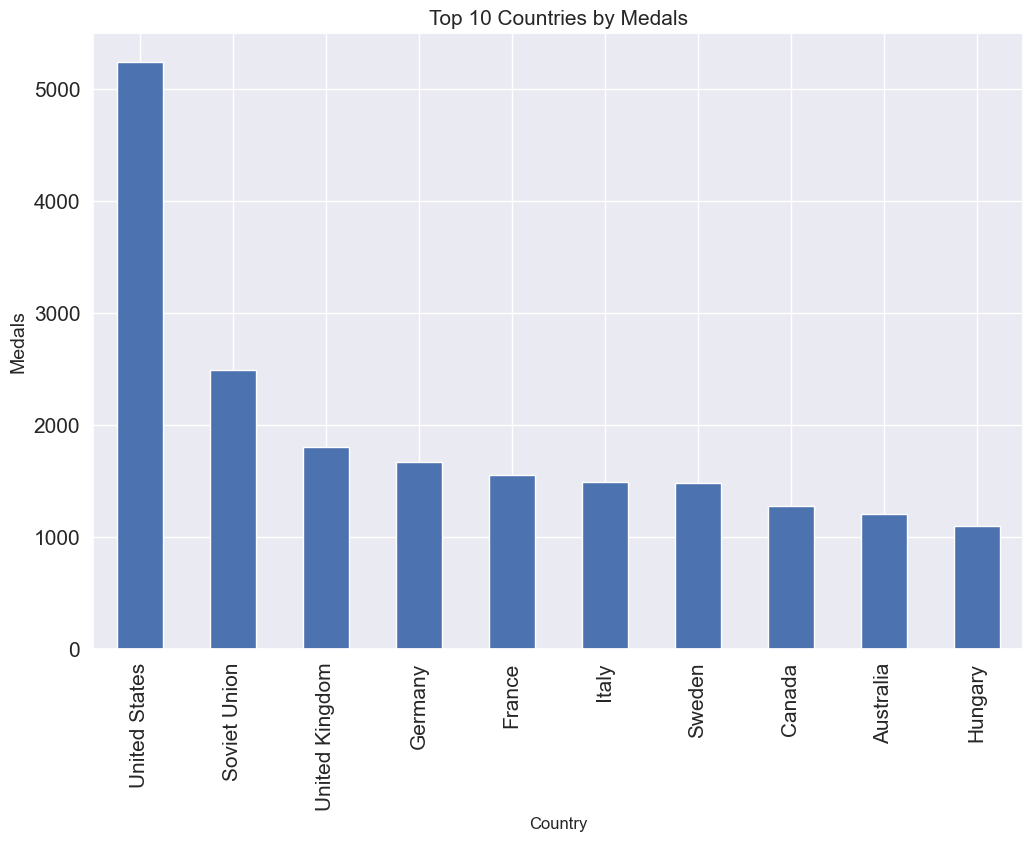

In [85]:
top_10.plot(kind = "bar", fontsize = 15, figsize=(12,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

##### Q. Split the total medals of Top 10 Countries into Summer / Winter. Are there typical Summer/Winter Games Countries?

In [86]:
# Gathering the top10 data
olympics_10 = olympics[olympics.Country.isin(top_10.index)]
olympics_10

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


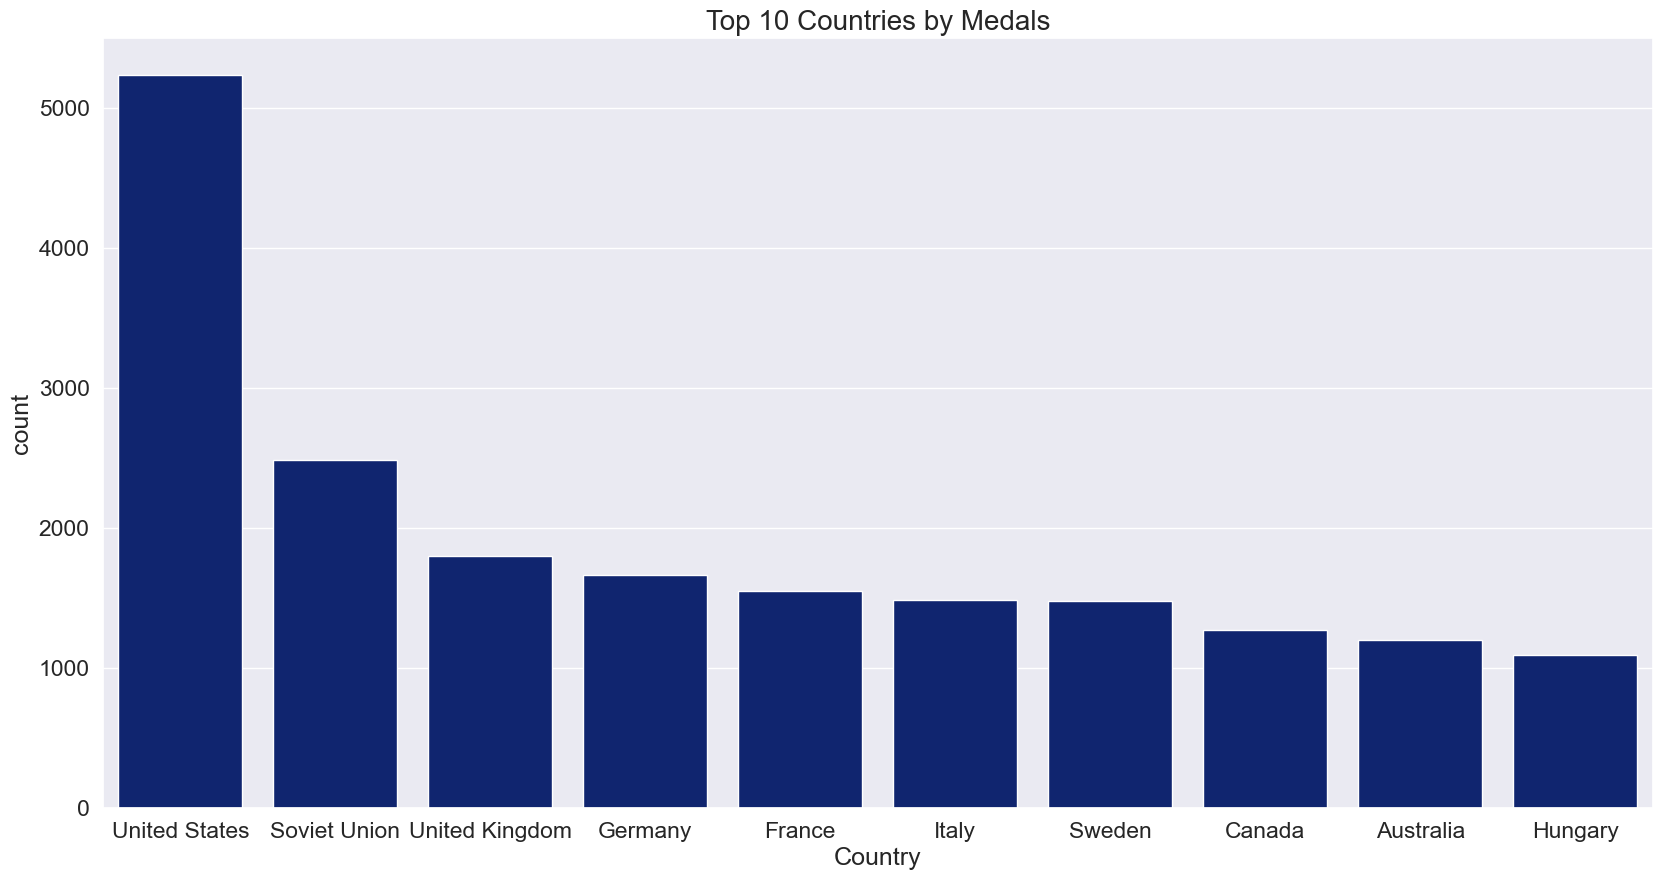

In [87]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

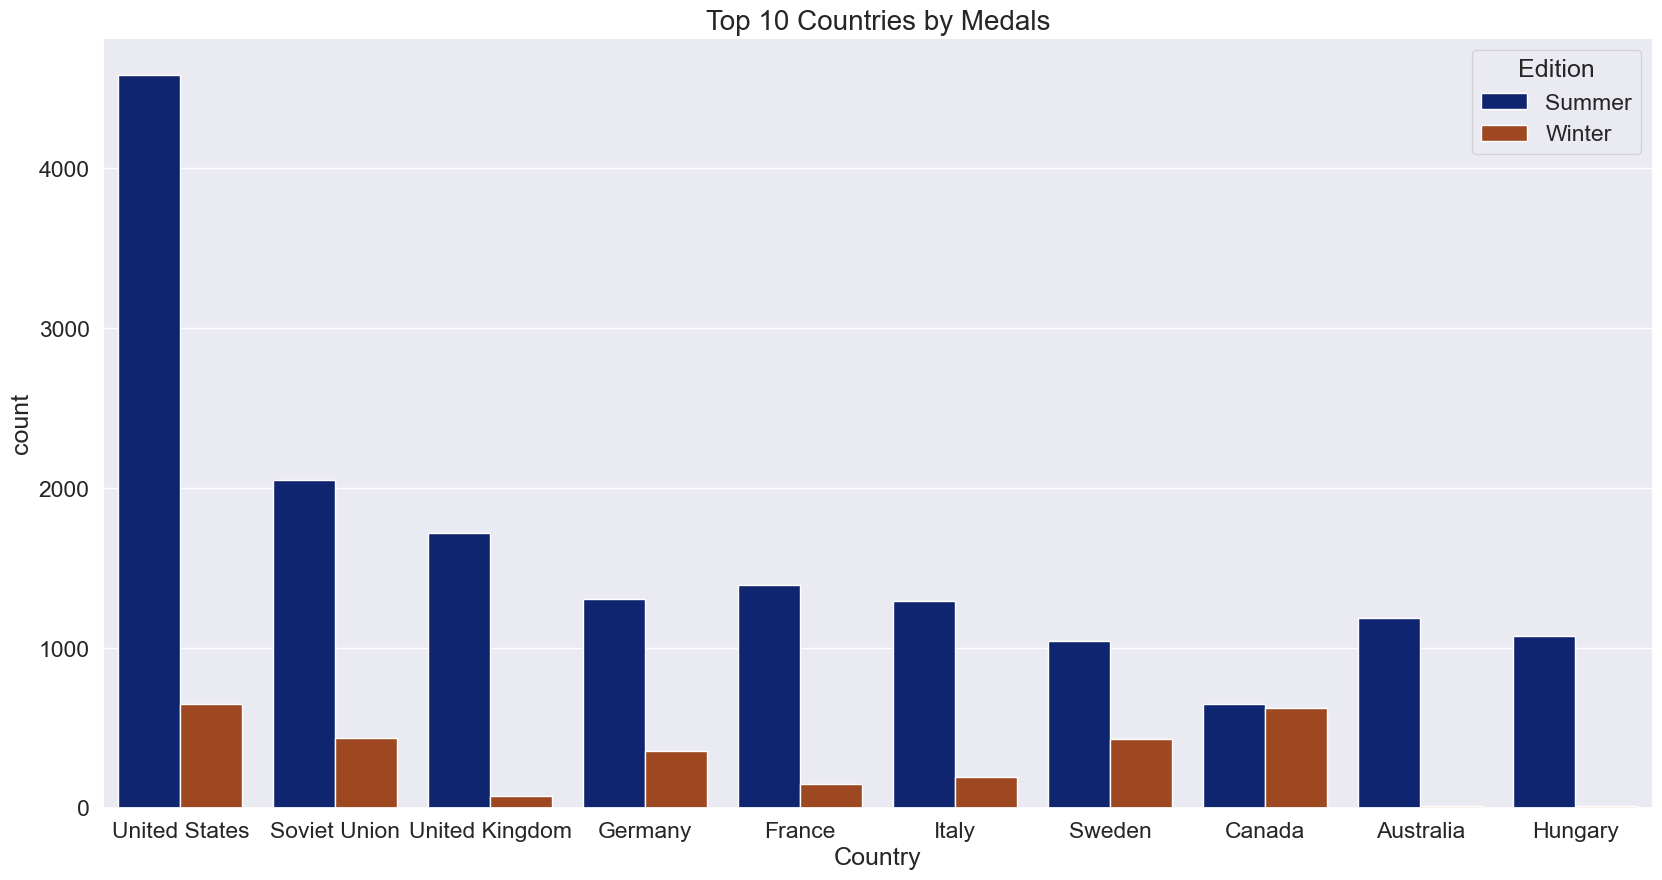

In [88]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Edition", order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

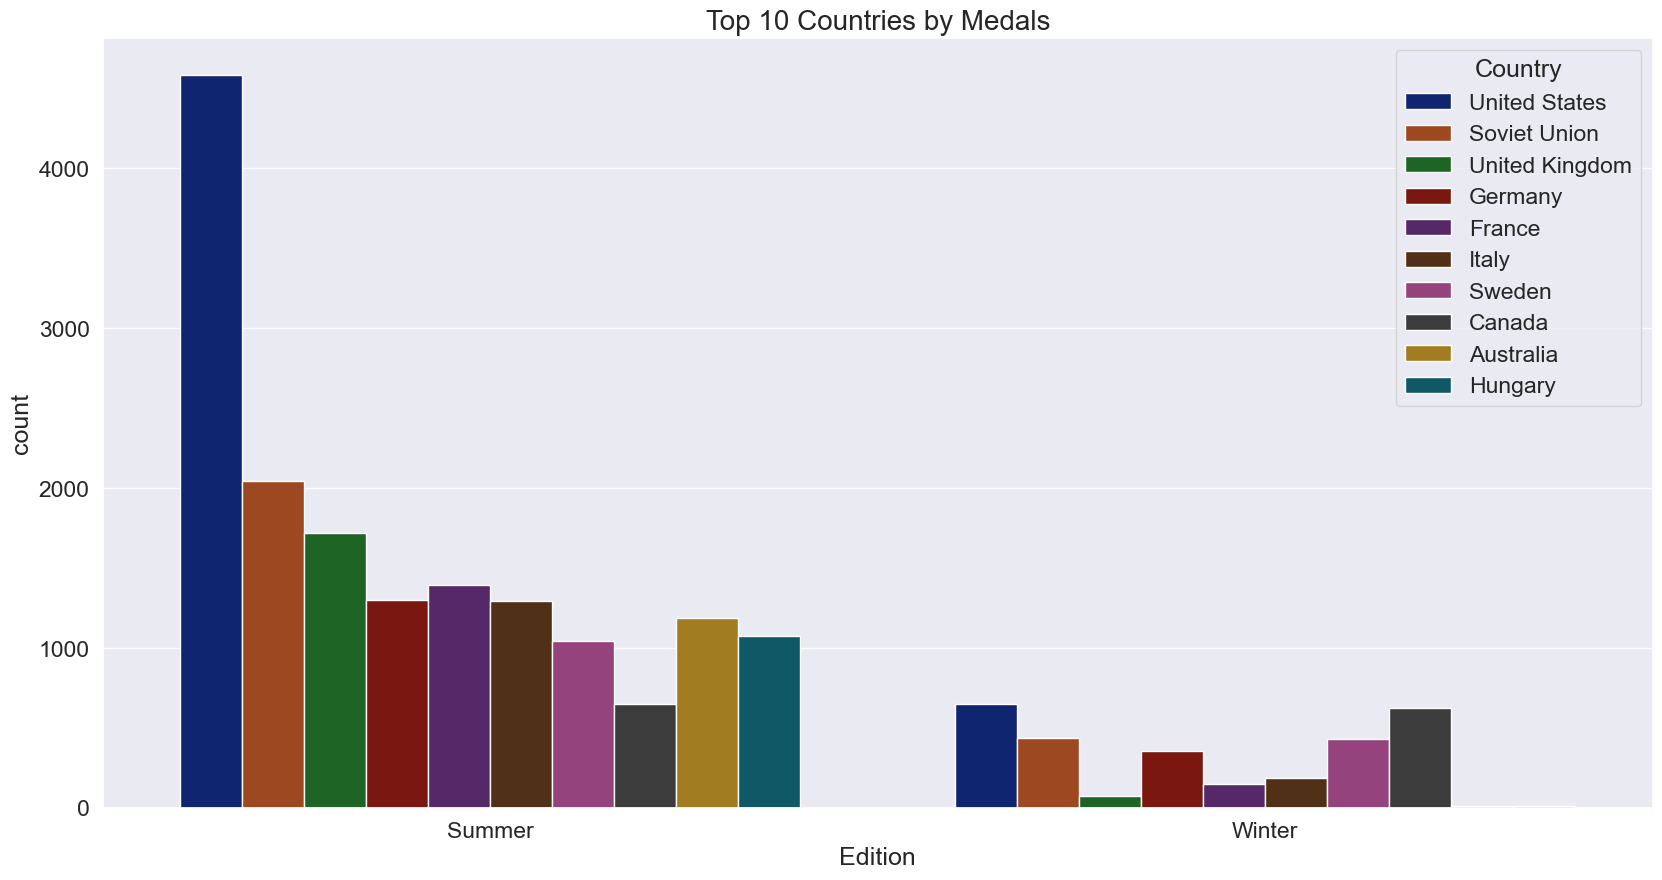

In [89]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Edition", hue = "Country", hue_order = top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

##### Q. Split the total medals of Top 10 Countries into Gold, Silver, Bronze

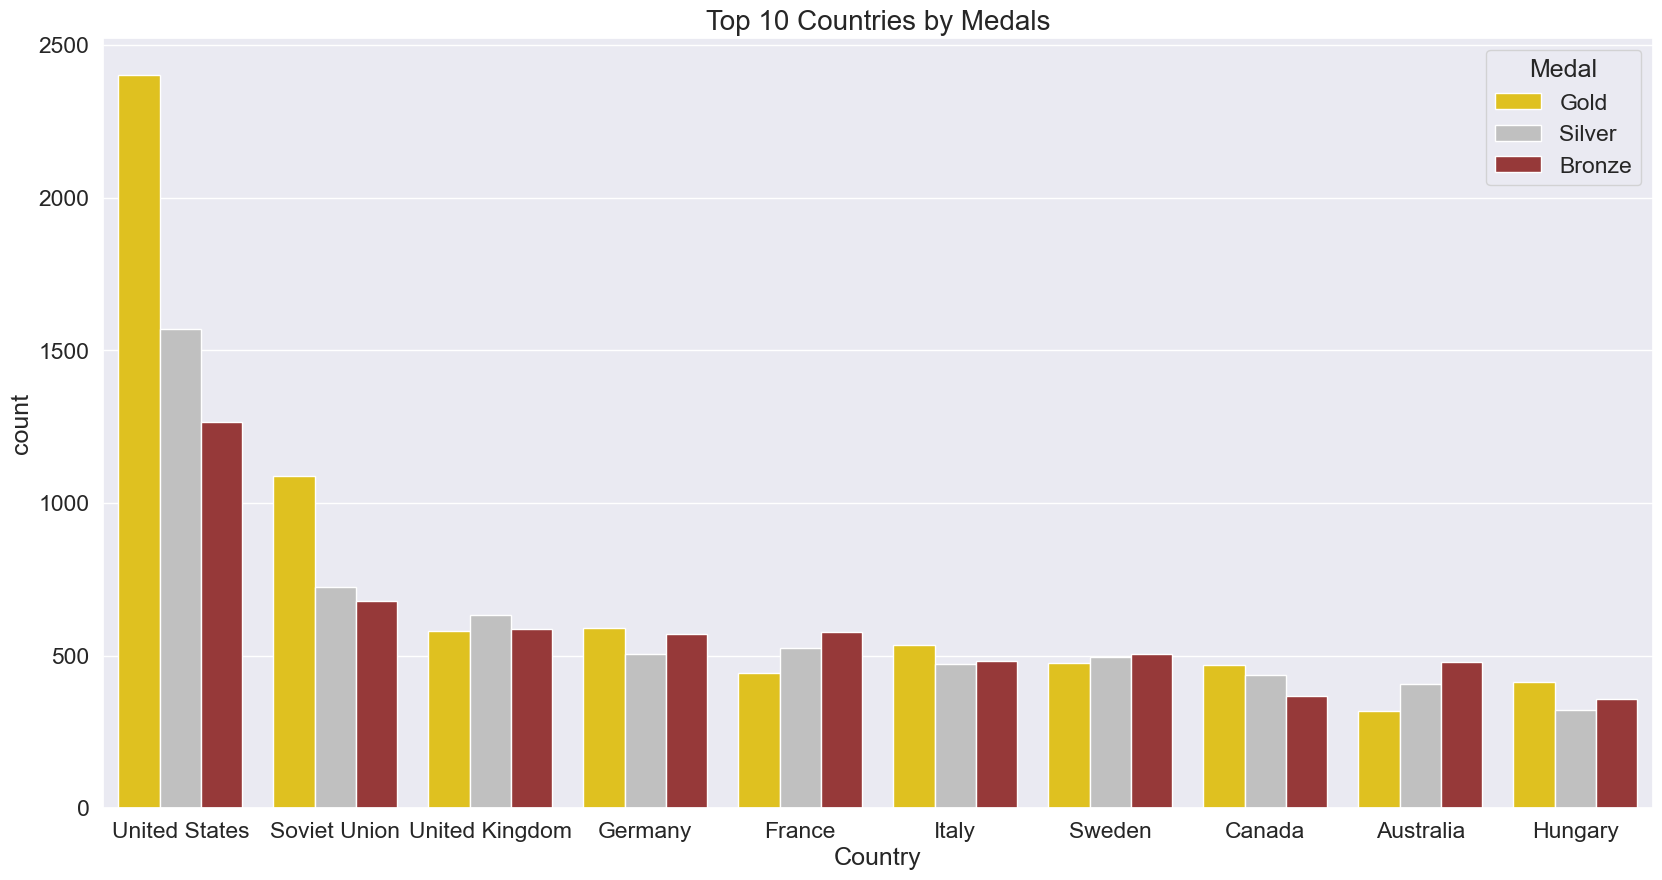

In [90]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Country", hue = "Medal", order = top_10.index,
              hue_order = ["Gold", "Silver", "Bronze"], palette = ["gold", "silver", "brown"])
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

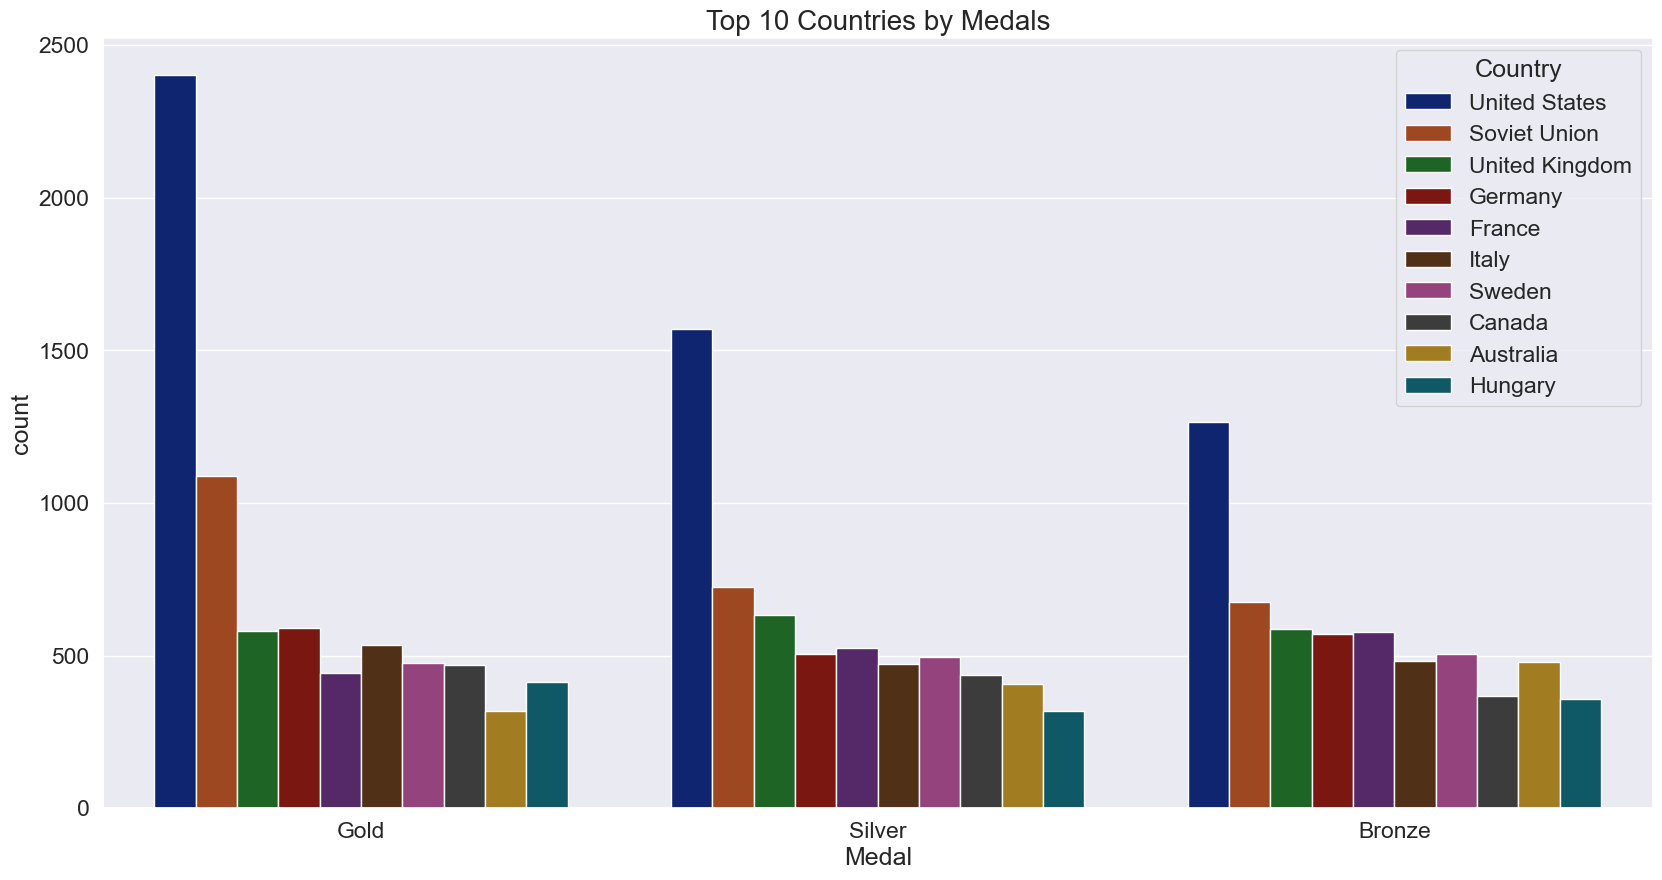

In [91]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5, palette= "dark")
sns.countplot(data = olympics_10, x = "Medal", hue = "Country", 
              order = ["Gold", "Silver", "Bronze"], hue_order= top_10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()